In [14]:
import numpy as np
import pandas as pd

In [15]:
data_path = 'data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [16]:
train.shape, test.shape

((10886, 12), (6493, 9))

### 3.3 feature engineering

In [17]:
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[0].split('-'))

2011-01-05
['2011', '01', '05']


In [18]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [19]:
from datetime import datetime
import calendar

In [20]:
print(train['date'][100])
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) 
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [21]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

In [22]:
train['season'] = train['season'].map({1: 'Spring',
                                      2: 'Summer',
                                      3: 'Fall',
                                      4: 'Winter'})

train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [23]:
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 3.4 data visualization

In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
mpl.rc('font', size = 15)

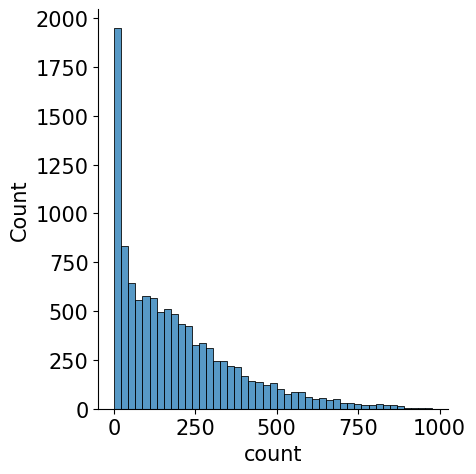

In [22]:
sns.displot(train['count']);

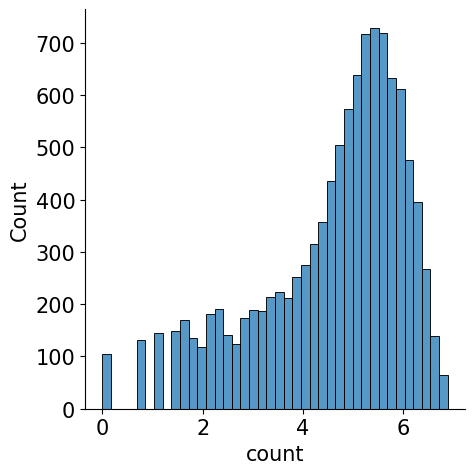

In [23]:
sns.displot(np.log(train['count']));

In [24]:
mpl.rc('font', size = 14) 
mpl.rc('axes', titlesize = 15)

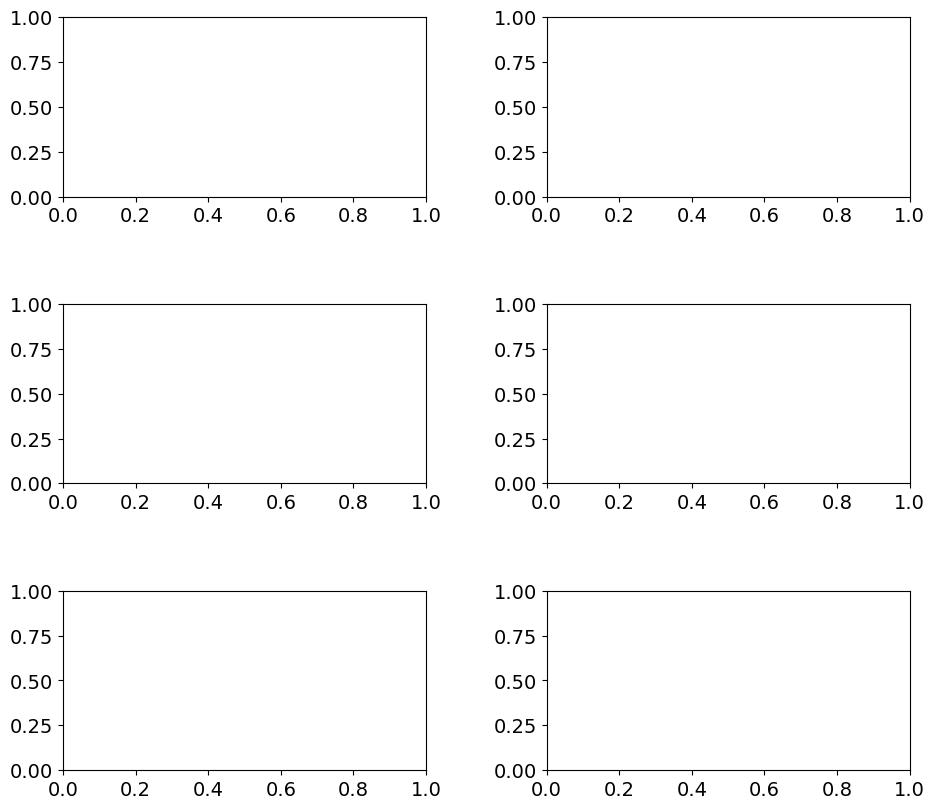

In [25]:
figure, axes = plt.subplots(nrows = 3, ncols = 2) 
plt.tight_layout() 
figure.set_size_inches(10, 9) 

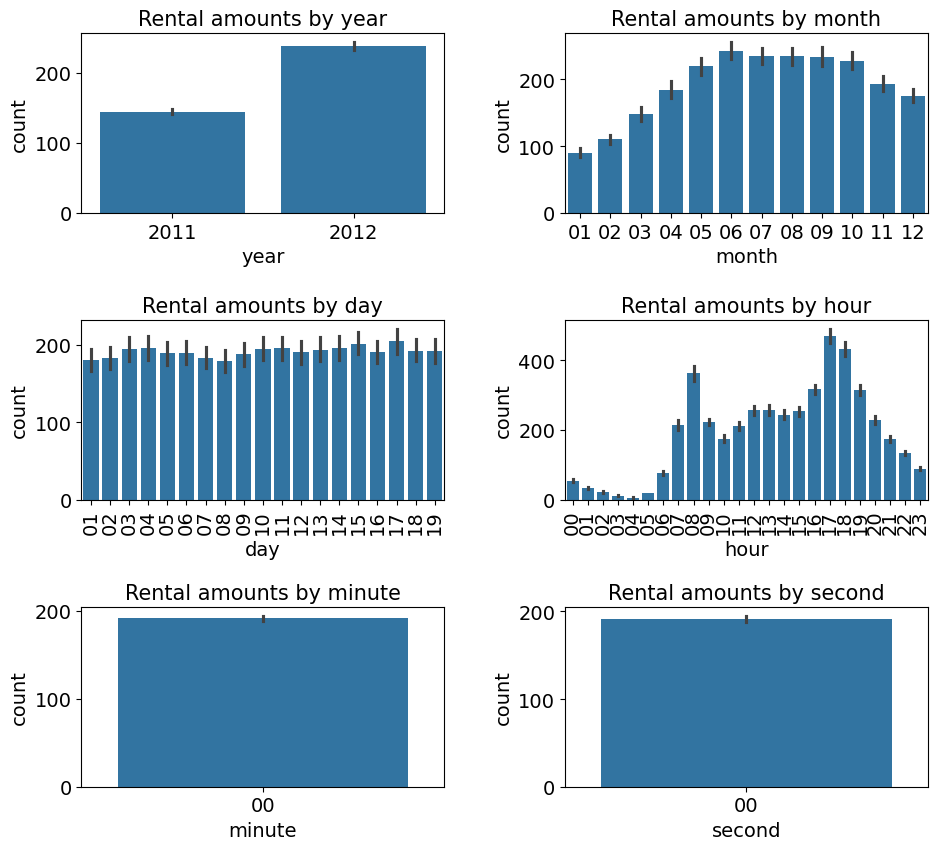

In [26]:
figure, axes = plt.subplots(nrows = 3, ncols = 2) 
plt.tight_layout()  
figure.set_size_inches(10, 9) 

sns.barplot(x = 'year', y = 'count', data = train, ax = axes[0, 0])
sns.barplot(x = 'month', y = 'count', data = train, ax = axes[0, 1])
sns.barplot(x = 'day', y = 'count', data = train, ax = axes[1, 0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = axes[1, 1])
sns.barplot(x = 'minute', y = 'count', data = train, ax = axes[2, 0])
sns.barplot(x = 'second', y = 'count', data = train, ax = axes[2, 1])

axes[0,0].set(title = 'Rental amounts by year')
axes[0,1].set(title = 'Rental amounts by month')
axes[1,0].set(title = 'Rental amounts by day')
axes[1,1].set(title = 'Rental amounts by hour')
axes[2,0].set(title = 'Rental amounts by minute')
axes[2,1].set(title = 'Rental amounts by second')

axes[1, 0].tick_params(axis = 'x', labelrotation = 90)
axes[1, 1].tick_params(axis = 'x', labelrotation = 90)

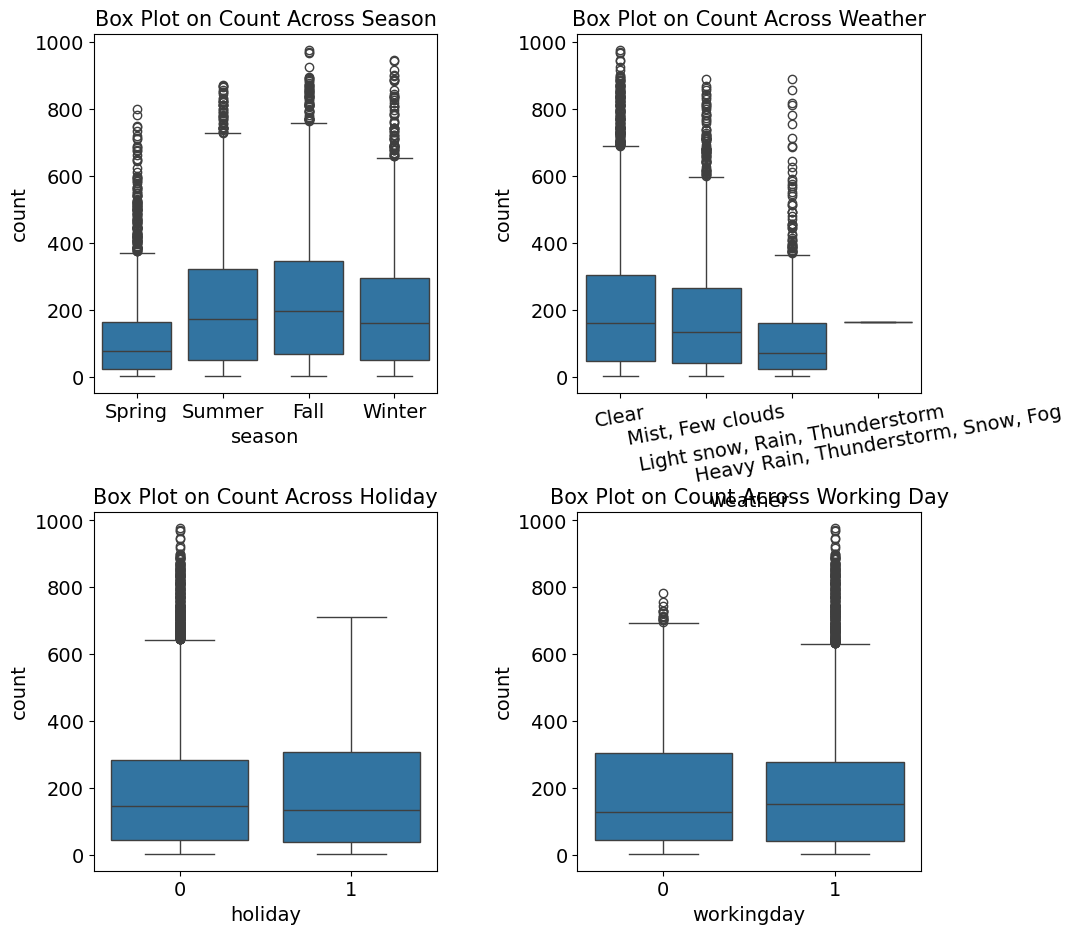

In [27]:
# boxplot

figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(x= 'season', y = 'count', data = train, ax= axes[0, 0])
sns.boxplot(x= 'weather', y = 'count', data = train, ax= axes[0, 1])
sns.boxplot(x= 'holiday', y = 'count', data = train, ax= axes[1, 0])
sns.boxplot(x= 'workingday', y = 'count', data = train, ax= axes[1, 1])

axes[0,0].set(title = 'Box Plot on Count Across Season')
axes[0,1].set(title = 'Box Plot on Count Across Weather')
axes[1,0].set(title = 'Box Plot on Count Across Holiday')
axes[1,1].set(title = 'Box Plot on Count Across Working Day')

axes[0,1].tick_params(axis = 'x', labelrotation = 10)

<Axes: xlabel='hour', ylabel='count'>

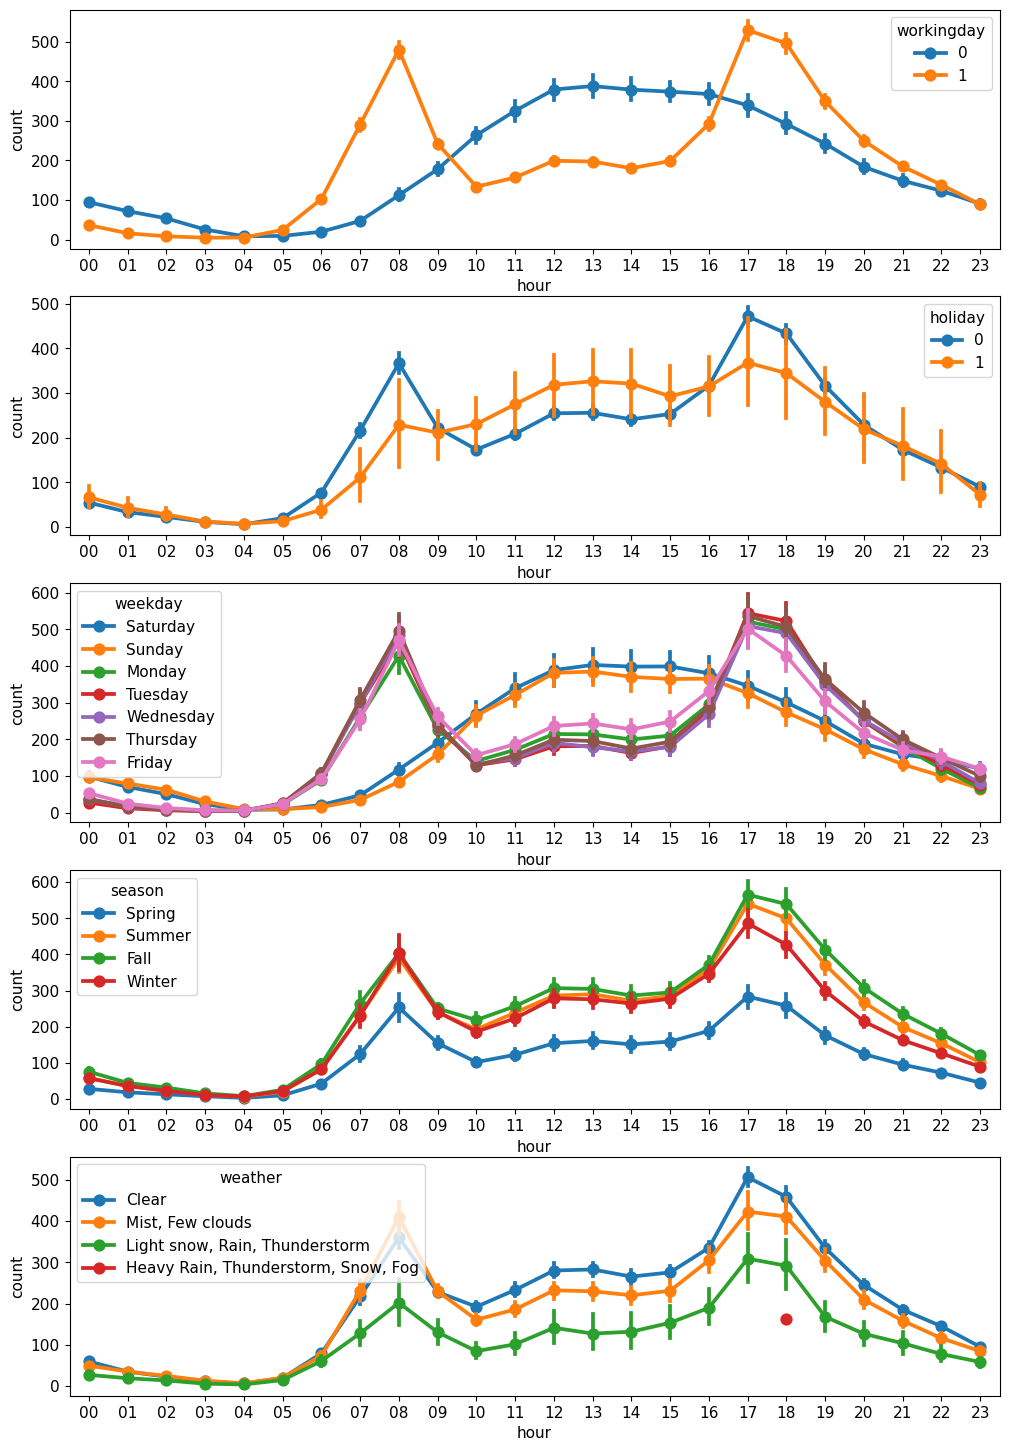

In [28]:
# pointplot

mpl.rc('font', size = 11)
figure, axes = plt.subplots(nrows = 5)
figure.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[4])

<Axes: xlabel='humidity', ylabel='count'>

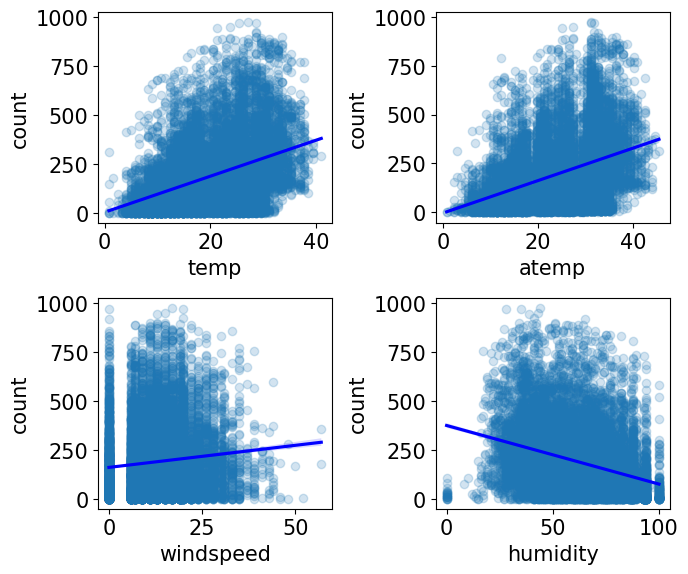

In [29]:
# scatter plot with regression line

mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(7, 6)


sns.regplot(x = 'temp', y = 'count', data = train, ax = axes[0,0], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

sns.regplot(x = 'atemp', y = 'count', data = train, ax = axes[0,1], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

sns.regplot(x = 'windspeed', y = 'count', data = train, ax = axes[1,0], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

sns.regplot(x = 'humidity', y = 'count', data = train, ax = axes[1,1], 
            scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})


In [30]:
# heatmap

train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


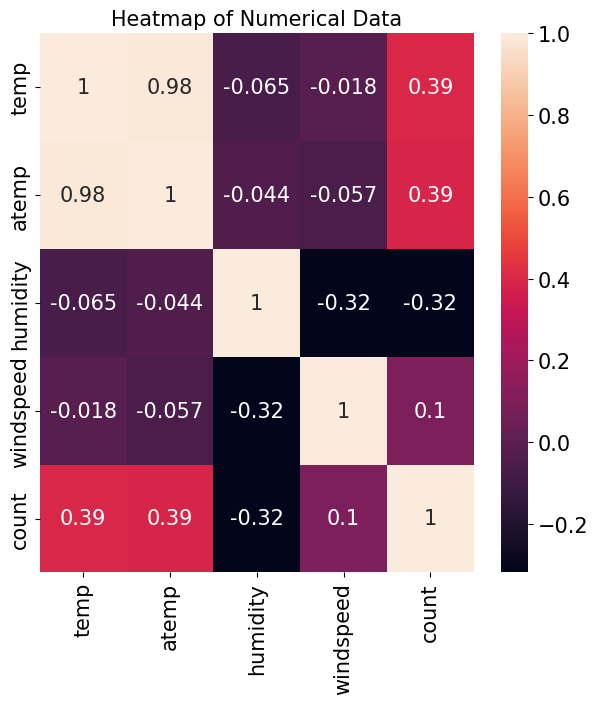

In [31]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.heatmap(corrMat, annot = True)
ax.set(title = 'Heatmap of Numerical Data');

# 4. baseline model

In [25]:
data_path = 'data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

### 4.1 feature engineering

In [26]:
# eliminating the outlier
train = train[train['weather'] != 4]

In [27]:
# concate data
all_data = pd.concat([train, test], ignore_index = True)

In [28]:
# 파생 피처(변수) 추가

from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x:x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[1])
all_data['hour'] = all_data['datetime'].apply(lambda x:x.split()[1].split(':')[0])
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(
    dateString, "%Y-%m-%d").weekday())

In [29]:
all_data.drop(['casual', 'registered', 'datetime', 'date', 'windspeed', 'month'], 
              axis = 1, inplace = True)

In [30]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

In [31]:
X_train = X_train.drop(['count'], axis = 1)
X_test = X_test.drop(['count'], axis = 1)

y = train['count']

### RMSLE (Evaluation function)

In [32]:
import numpy as np

def rmsle(y_true, y_pred, convertExp = True):
    # transfomring into 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)


    # After log transformation, also transforming NAN into 0
    
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))

    # RMSLE calculation
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output

# 5. ridge regression model

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [38]:
# hyperparameter list
ridge_params = {'max_iter': [3000], 
                'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# cross-validation evaluation function (calculate RMSLE score)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)

# create gridsearch object
gridsearch_ridge_model = GridSearchCV(estimator = ridge_model, # ridge model
                                      param_grid = ridge_params, # value list
                                      scoring = rmsle_scorer, # evaulation index
                                      cv = 5) # a division number of cross-validation

In [40]:
log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

In [43]:
print('optimized hyperparameter:', gridsearch_ridge_model.best_params_)

optimized hyperparameter: {'alpha': 0.1, 'max_iter': 3000}


In [45]:
# prediction
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# evaluation
print(f'ridge regression RMSLE value: {rmsle(log_y, preds, True):.4f}')

ridge regression RMSLE value: 1.0205


### since the score of ridge model showed the same as linear model, I will not submit again